# ML:DATA PREPROCESSING USING EMPLOYEE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\ML\DATA PREPROCESSING\Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (148, 6)


In [5]:
print("No. of elements in the dataset : ",df.size)

No. of elements in the dataset :  888


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [14]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique values in the column\n ",i ,":" ,df[i].unique())
   
    print("Length of unique values in the column ",i," is " ,len(df[i].unique()))
    print("\n")

Name of column :  Company
Unique values in the column
  Company : ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in the column  Company  is  7


Name of column :  Age
Unique values in the column
  Age : [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in the column  Age  is  30


Name of column :  Salary
Unique values in the column
  Salary : [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in the column  Salary  is  41


Name of column :  Place
Unique values in the column
  Place : ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of u

In [19]:
df['Company'] = df['Company'].map({'Tata Consultancy Services':'TCS','Congnizant': 'CTS','Infosys Pvt Lmt': 'Infosys'}).fillna(df['Company'])
print("Renamed Company names and value counts \n", df["Company"].value_counts())

Renamed Company names and value counts 
 Company
TCS        55
Infosys    47
CTS        38
Name: count, dtype: int64


In [20]:
df.drop(columns='Country',inplace=True)

# Data Cleaning

In [21]:
df[df.duplicated()]

,Company,Age,Salary,Place,Gender
84,CTS,43.0,NaN,Mumbai,0
130,TCS,21.0,4824.0,Mumbai,0
131,Infosys,NaN,5835.0,Mumbai,0
144,Infosys,22.0,8787.0,Calcutta,1


In [22]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Company,Age,Salary,Place,Gender


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


In [24]:
df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [25]:
p1,p2,p3=df.Age.quantile([0.25,0.50,0.75]) 
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(p1,p2,p3))
IQR=p3-p1
print("IQR = ",IQR)
LW=p1-1.5*IQR 
UW=p3+1.5*IQR 
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df[(df["Age"]<LW)|(df["Age"]>UW)]

25 percentile = 22.0, 50 percentile = 33.0, 75 percentile = 37.5
IQR =  15.5
Lower Whisker = -1.25  Upper Whisker = 60.75


,Company,Age,Salary,Place,Gender


In [27]:
q1,q2,q3=df.Salary.quantile([0.25,0.50,0.75]) 
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
IQR=q3-q1
print("IQR = ",IQR)
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df[(df["Age"]<LW)|(df["Age"]>UW)]

25 percentile = 3030.0, 50 percentile = 5000.0, 75 percentile = 8000.0
IQR =  4970.0
Lower Whisker = -4425.0  Upper Whisker = 15455.0


,Company,Age,Salary,Place,Gender


In [28]:
print(df[df.Age==0])
df['Age'].replace(0,np.nan, inplace=True)

     Company  Age  Salary       Place  Gender
88   Infosys  0.0  3030.0    Calcutta       0
92       TCS  0.0  3045.0       Delhi       0
101      CTS  0.0  2034.0  Podicherry       0
107      TCS  0.0  9024.0     Chennai       1
111  Infosys  0.0  3234.0      Mumbai       0
121      CTS  0.0  1234.0    Calcutta       0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      121 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


Filling the null values

In [30]:
df.describe()

,Age,Salary,Gender
count,121.000000,121.000000,144.000000
mean,32.041322,5283.471074,0.222222
std,8.989250,2585.373600,0.417191
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_5244\3460325010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Salary,color='y')


<Axes: xlabel='Salary', ylabel='Density'>

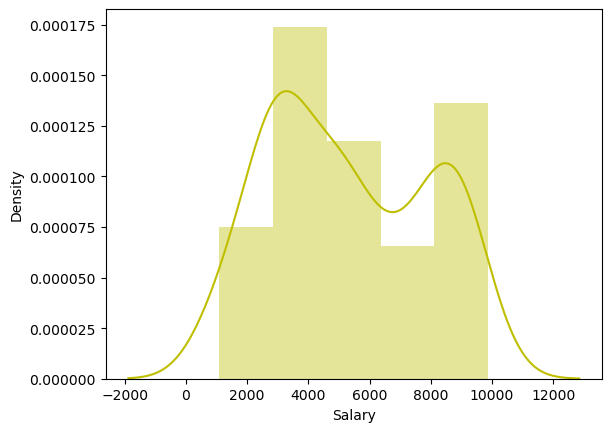

In [31]:
sns.distplot(df.Salary,color='y')

C:\Users\user\AppData\Local\Temp\ipykernel_5244\4172036737.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age,color='b')


<Axes: xlabel='Age', ylabel='Density'>

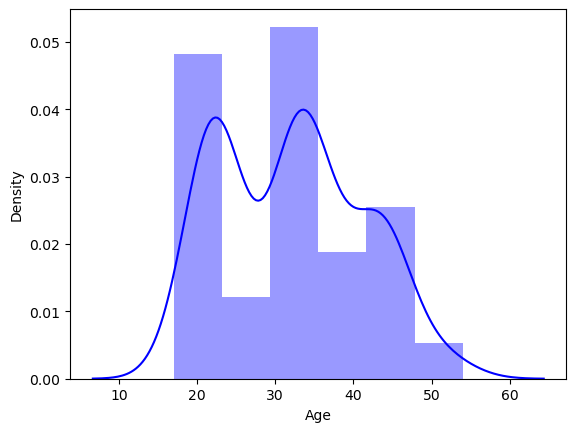

In [32]:
sns.distplot(df.Age,color='b')

In [33]:
C=df['Company'].mode()
P=df.Place.mode()

df=df.fillna(value={'Company':'TCS','Place':"Mumbai",'Salary':df.Salary.median(),'Age':df.Age.median()})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB
None


Data Analysis

In [34]:
df[(df.Age>40)&(df.Salary<5000)]

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


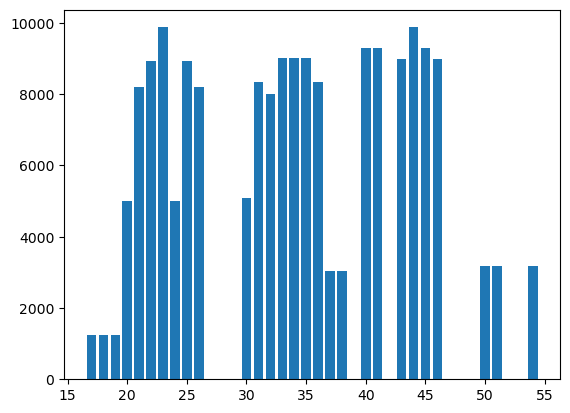

In [35]:
plt.bar(df.Age,df.Salary)
plt.show()

<Axes: xlabel='count', ylabel='Place'>

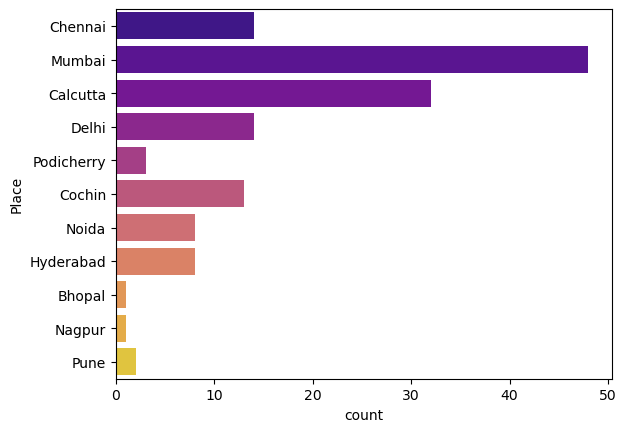

In [36]:
sns.countplot(y = 'Place', data = df, palette = 'plasma')

Data Encoding

In [37]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Company", "Place"])

print(df_one_hot_encoded )

      Age  Salary  Gender  Company_CTS  Company_Infosys  Company_TCS  \
0    20.0  5000.0       0        False            False         True   
1    30.0  5000.0       0        False             True        False   
2    35.0  2300.0       0        False            False         True   
3    40.0  3000.0       0        False             True        False   
4    23.0  4000.0       0        False            False         True   
..    ...     ...     ...          ...              ...          ...   
142  22.0  8202.0       0        False             True        False   
143  33.0  9024.0       1        False            False         True   
145  44.0  4034.0       1        False             True        False   
146  33.0  5034.0       1        False            False         True   
147  22.0  8202.0       0        False             True        False   

     Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  \
0           False           False           True        

# One hot Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Company", "Place"]
new_encoded_cols_names = []
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].sort_values().unique().tolist()]

one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)
print(df_one_hot_encoded)

     Company   Age  Salary     Place  Gender  is_CTS  is_Infosys  is_TCS  \
0        TCS  20.0  5000.0   Chennai       0     0.0         0.0     1.0   
1    Infosys  30.0  5000.0    Mumbai       0     0.0         1.0     0.0   
2        TCS  35.0  2300.0  Calcutta       0     0.0         0.0     1.0   
3    Infosys  40.0  3000.0     Delhi       0     0.0         1.0     0.0   
4        TCS  23.0  4000.0    Mumbai       0     0.0         0.0     1.0   
..       ...   ...     ...       ...     ...     ...         ...     ...   
142  Infosys  22.0  8202.0    Mumbai       0     0.0         0.0     1.0   
143      TCS  33.0  9024.0  Calcutta       1     0.0         1.0     0.0   
145  Infosys  44.0  4034.0     Delhi       1     NaN         NaN     NaN   
146      TCS  33.0  5034.0    Mumbai       1     NaN         NaN     NaN   
147  Infosys  22.0  8202.0    Cochin       0     NaN         NaN     NaN   

     is_Bhopal  is_Calcutta  is_Chennai  is_Cochin  is_Delhi  is_Hyderabad  \
0        

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df[["Company","Place"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,Company,Age,Salary,Place,Gender
0,2,20.0,5000.0,2,0
1,1,30.0,5000.0,6,0
2,2,35.0,2300.0,1,0
3,1,40.0,3000.0,4,0
4,2,23.0,4000.0,6,0
...,...,...,...,...,...
142,1,22.0,8202.0,6,0
143,2,33.0,9024.0,1,1
145,1,44.0,4034.0,4,1
146,2,33.0,5034.0,6,1


# Scaling

Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler


# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(3))

[[ 1.019 -1.485 -0.101 -0.893 -0.535]
 [-0.214 -0.267 -0.101  0.751 -0.535]
 [ 1.019  0.342 -1.244 -1.304 -0.535]
 [-0.214  0.95  -0.947 -0.071 -0.535]
 [ 1.019 -1.119 -0.524  0.751 -0.535]
 [-0.214  0.098 -0.101 -1.304 -0.535]
 [ 1.019  0.098  0.322 -0.893  1.871]
 [-0.214 -1.119  0.746  0.751  1.871]
 [ 1.019  0.22   1.169 -1.304  1.871]
 [-1.448  1.559  1.592 -0.071 -0.535]
 [-1.448 -1.119 -0.101  0.751 -0.535]
 [-1.448  0.22  -1.756 -1.304 -0.535]
 [-1.448  1.559 -0.101 -0.893 -0.535]
 [-1.448 -1.728 -1.695  0.751 -0.535]
 [-0.214  0.95  -0.947 -1.304 -0.535]
 [ 1.019 -1.119 -0.947 -0.071 -0.535]
 [-0.214 -1.119 -0.935  1.983 -0.535]
 [ 1.019  0.22  -0.101 -0.482 -0.535]
 [ 1.019 -1.241 -0.101 -0.893 -0.535]
 [-0.214 -0.024 -0.101  0.751 -0.535]
 [ 1.019  0.585 -0.928 -1.304 -0.535]
 [-0.214  2.168 -0.87  -0.071 -0.535]
 [ 1.019 -1.363 -0.175  0.751 -0.535]
 [-0.214  0.098  0.253 -0.482 -0.535]
 [ 1.019  0.098  0.781 -0.893  1.871]
 [-0.214 -1.119  1.568  0.751  1.871]
 [ 1.019  0.

# MinMax Scaler

In [42]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(2))

[[1.   0.08 0.45 0.2  0.  ]
 [0.5  0.35 0.45 0.6  0.  ]
 [1.   0.49 0.14 0.1  0.  ]
 [0.5  0.62 0.22 0.4  0.  ]
 [1.   0.16 0.33 0.6  0.  ]
 [0.5  0.43 0.45 0.1  0.  ]
 [1.   0.43 0.56 0.2  1.  ]
 [0.5  0.16 0.67 0.6  1.  ]
 [1.   0.46 0.79 0.1  1.  ]
 [0.   0.76 0.9  0.4  0.  ]
 [0.   0.16 0.45 0.6  0.  ]
 [0.   0.46 0.   0.1  0.  ]
 [0.   0.76 0.45 0.2  0.  ]
 [0.   0.03 0.02 0.6  0.  ]
 [0.5  0.62 0.22 0.1  0.  ]
 [1.   0.16 0.22 0.4  0.  ]
 [0.5  0.16 0.22 0.9  0.  ]
 [1.   0.46 0.45 0.3  0.  ]
 [1.   0.14 0.45 0.2  0.  ]
 [0.5  0.41 0.45 0.6  0.  ]
 [1.   0.54 0.22 0.1  0.  ]
 [0.5  0.89 0.24 0.4  0.  ]
 [1.   0.11 0.43 0.6  0.  ]
 [0.5  0.43 0.54 0.3  0.  ]
 [1.   0.43 0.68 0.2  1.  ]
 [0.5  0.16 0.89 0.6  1.  ]
 [1.   0.46 0.83 0.1  1.  ]
 [0.   0.76 0.93 0.4  1.  ]
 [0.   0.16 1.   0.6  1.  ]
 [0.   0.49 0.11 0.3  0.  ]
 [0.   0.78 0.75 0.2  0.  ]
 [0.   0.08 0.21 0.6  0.  ]
 [0.5  0.76 0.34 0.1  0.  ]
 [1.   0.51 0.45 0.6  0.  ]
 [0.5  0.24 0.81 0.6  0.  ]
 [1.   0.49 0.9  0.6